### Feature Engineering


"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data." Jason Brownlee,

1. Construct new features: Use domain knowledge, creating products of features, etc.

2. Use recursive feature elimination to recursively remove attributes to meet the number of required features and then builds a model on those attributes that remain to see if you can you match or improve performance with a smaller subset.

3. Use backward elimination to recursively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

4. Forward selection begins with an empty equation. Predictors are added one at a time beginning with the predictor with the highest correlation with the dependent variable. Variables of greater theoretical importance are entered first. Once in the equation, the variable remains there.

5. Compare several of these feature selection methods. Select the best approach with model selection.

6. To improve performance and/or understanding, subsample your data and redo your analysis for several samples.

##### Curse of Dimensionality  ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import wrangle
import env
import util
import split_scale

In [2]:
# scale data


In [3]:
# split data

In [4]:
# visualize data

# plt.scatter(df.exam_1, scaled_exam_1)


In [5]:

# x_train = scaled.drop(columns=["target"])
# y_train = scaled[["target"]]
# f_selector = SelectKBest(f_regression, k=3).fit(x_train, y_train)    k=10 by default   returns scores and p_values
# f_support.get_support()     calling a list of features by creating a boolean list
# x_train

#### Wrapper Methods

-evaluate based on the performance of your ML algorithm

    -backward elimination
        -run model, check, remove the worst
        -iterate
        
    -forward seelction
        -
        
    -recursive feature elimination (RFE)
        -take the model and number of features provided (k) and return ranking of all variables and its support (T/F)

#### Embedded Methods

    -LassoCV

    -ElasticNet

    -RidgeRegression

    -Regularized Regression

-penalize worst performing features

-assigns a coef of 0 to "bad" features


#### Lasso CV

from sklearn.linear_model import LassoCV

reg = LassoCV()

reg.fit(x_train, y_train)

reg.alpha_

reg.score(x_train, y_train)

reg.coef_


#### Linear Dimensionality Reduction

-PCA: principle components analysis

-unsupervised

-data must be scaled and centered

-not interpretable

-can have its use cases but...
    
    -black box, we won't look at this too much

#### Exercises

-Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

In [6]:
# wrangle gets and cleans data for me

df = wrangle.wrangle_telco()

In [7]:
df.head()

,monthly_charges,total_charges,tenure
0,109.70,7904.25,71
1,84.65,5377.80,63
2,90.45,5957.90,65
3,45.20,2460.55,54
4,116.80,8456.75,72


#### Explore

1. are my indeendent variables independent of each other? (ideal)
    -this must be true for your regression to work
    
2. is my dependent variable dependent on the indepnedent variables? (ideal)

3. what are the drivers of my target variable? (could be some/all independent variables and/or other features not already identified)


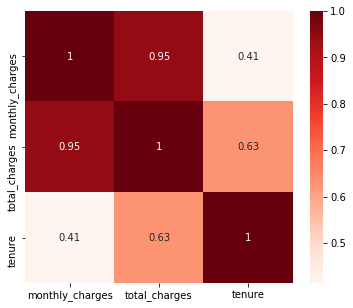

In [8]:
# Filter Method - Correlation: features to target, within features

plt.figure(figsize=(6, 5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [9]:
df.head()

,monthly_charges,total_charges,tenure
0,109.70,7904.25,71
1,84.65,5377.80,63
2,90.45,5957.90,65
3,45.20,2460.55,54
4,116.80,8456.75,72


In [10]:
df.describe()

,monthly_charges,total_charges,tenure
count,1685.000000,1685.000000,1685.00000
mean,60.872374,3728.933947,57.07181
std,34.712210,2571.252806,17.72913
min,18.400000,20.350000,1.00000
25%,24.050000,1278.800000,48.00000
50%,64.450000,3623.950000,64.00000
75%,90.550000,5999.850000,71.00000
max,118.750000,8672.450000,72.00000


In [11]:
# split data into test and train using function
train, test = split_scale.split_my_data(df)
y_train = train[["total_charges"]]
x_train = train.drop(columns=["total_charges"])
y_test = test[["total_charges"]]
x_test = test.drop(columns=["total_charges"])

1 and 2. Write a function, select_kbest_freg_unscaled() that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.


In [12]:
def select_kbest_freg(x, y, k):
    """Removes all but highest scoring features
    Takes:
          k - int: number of features
          x - df of features
          y - df of target
    Returns:
          list of column names of highest scoring features
    """
    f_selector = SelectKBest(f_regression, k).fit(x, y)
    f_support = f_selector.get_support()
    f_feature = x.loc[:,f_support].columns.tolist()
    return f_feature

In [13]:
f_feature = select_kbest_freg(x, y, 2)
f_feature

NameError: name 'x' is not defined

In [ ]:
# scale train and test data from df

scaler, train_scaled, test_scaled = split_scale.min_max_scaler(train, test)

In [ ]:
y_train_scaled = train[["total_charges"]]
x_train_scaled = train.drop(columns=["total_charges"])

In [ ]:
f_feature_scaled = select_kbest_freg(x_train_scaled, y_train_scaled, 2)
f_feature_scaled

3. Write a function, ols_backware_elimination() that takes X_train and y_train (scaled) as input and returns selected features based on the ols backwards elimination method.

In [ ]:
ols_model = sm.OLS(y_train, x_train)
fit = ols_model.fit()
fit.summary()

In [ ]:
def ols_backware_elimination(x, y):
    """Removes all but highest scoring features
    Takes:
          x - df of features
          y - df of target
    Returns:
          list of column names of highest scoring features
    """
    cols = list(x.columns)
    while (len(cols) > 0):
        x_1 = x[cols]
        x_1 = sm.add_constant(x_1)
        model = sm.OLS(y, x_1).fit()
        p = model.pvalues
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    return cols 

In [ ]:
ols_backware_elimination(x_train_scaled, y_train_scaled)

4. Write a function, lasso_cv_coef() that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.

In [ ]:
reg = LassoCV()
reg.fit(x_train_scaled, y_train_scaled)

In [ ]:
reg.alpha_

In [ ]:
reg.score(x_train_scaled, y_train_scaled)

In [ ]:
coef = pd.Series(reg.coef_, index = x_train_scaled.columns)
coef

In [ ]:
reg = LassoCV().fit(x_train_scaled, y_train_scaled)
reg

In [ ]:
def lasso_cs_coef(x, y):
    """
    
    """
    reg = LassoCV().fit(x, y)
    coef = pd.Series(reg.coef_, index = x.columns)
    imp_coef = coef.sort_values()
    plot = imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    plt.show()
    return coef

In [ ]:
lasso_cs_coef(x_train_scaled, y_train_scaled)

5. Write 3 functions, the first computes the number of optimum features (n) using rfe, the second takes n as input and returns the top n features, and the third takes the list of the top n features as input and returns a new X_train and X_test dataframe with those top features , recursive_feature_elimination() that computes the optimum number of features (n) and returns the top n features.

In [ ]:
# model = LinearRegression()
# rfe = RFE(model, 2)
# x_rfe = rfe.fit_transform(x_train, y_train)
# x_rfe

In [ ]:
def optimumal_number_of_features(x, y):   
    """
    Takes:
          x_train: Pandas df
          y_train: Pandas df
    Returns:
          int: number of optimum features
    """ 
    features_range = range(1, len(x.columns)+1)
    high_score = 0
    number_of_features = 0
    for n in features_range:
        model = LinearRegression()
        train_rfe = RFE(model, n).fit_transform(x, y)
        model.fit(train_rfe, y)
        score = model.score(train_rfe, y)
        if(score > high_score):
            high_Score = score
            number_of_features = n
    return number_of_features, score

In [ ]:
optimal_number_of_features(x_train, y_train)

In [ ]:
def optimal_features(x_train, y_train, x_test, y_test):
    